In [ ]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz

In [ ]:
!tar -xvf spark-3.2.1-bin-hadoop3.2.tgz

spark-3.2.1-bin-hadoop3.2/
spark-3.2.1-bin-hadoop3.2/LICENSE
spark-3.2.1-bin-hadoop3.2/NOTICE
spark-3.2.1-bin-hadoop3.2/R/
spark-3.2.1-bin-hadoop3.2/R/lib/
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/DESCRIPTION
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/INDEX
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/Rd.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/features.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/hsearch.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/links.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/nsInfo.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/package.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/vignette.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/NAMESPACE
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/R/
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/R/SparkR
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/R/SparkR.rdb
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/R/SparkR.rdx
spark-3.2.1-bin-hadoop3.2/R/lib/Sp

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"

In [ ]:
!pip install pyspark

In [ ]:
!pip install -q findspark

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import ltrim,rtrim,trim
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.sql.functions import round
from pyspark.sql.functions import col, to_date
import datetime
from pyspark.sql.functions import year, month, dayofmonth

In [ ]:
sc = SparkContext("local")
spark = SparkSession(sc)

In [ ]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as f
from pyspark.sql.functions import explode, udf
from pyspark.sql.types import *
from pyspark.sql.functions import col
from pyspark.ml.feature import * 
import re
import string
import pyspark.sql.functions as func
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
business = spark.read.format("csv").option("header","true").option("delimiter",",").option("quote", "\"").option("escape", "\"").load("/content/gdrive/MyDrive/Scalable/yelp-dataset/yelp_business.csv")

In [ ]:
business.show()

+--------------------+--------------------+------------------+--------------------+--------------+-----+-----------+-------------+--------------+-----+------------+-------+--------------------+
|         business_id|                name|      neighborhood|             address|          city|state|postal_code|     latitude|     longitude|stars|review_count|is_open|          categories|
+--------------------+--------------------+------------------+--------------------+--------------+-----+-----------+-------------+--------------+-----+------------+-------+--------------------+
|FYWN1wneV18bWNgQj...|  "Dental by Design"|              null|"4855 E Warner Rd...|     Ahwatukee|   AZ|      85044|   33.3306902|  -111.9785992|  4.0|          22|      1|Dentists;General ...|
|He-G7vWjzVUysIKrf...|"Stephen Szabo Sa...|              null|"3101 Washington Rd"|      McMurray|   PA|      15317|   40.2916853|   -80.1048999|  3.0|          11|      1|Hair Stylists;Hai...|
|KQPW8lFf1y5BT2Mxi...|"Western

In [ ]:
business.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- neighborhood: string (nullable = true)
 |-- address: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- postal_code: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- stars: string (nullable = true)
 |-- review_count: string (nullable = true)
 |-- is_open: string (nullable = true)
 |-- categories: string (nullable = true)



In [ ]:
business_filtered = business.select('business_id','name','city','state','stars','review_count','is_open','categories')

In [ ]:
business_filtered.show()

+--------------------+--------------------+--------------+-----+-----+------------+-------+--------------------+
|         business_id|                name|          city|state|stars|review_count|is_open|          categories|
+--------------------+--------------------+--------------+-----+-----+------------+-------+--------------------+
|FYWN1wneV18bWNgQj...|  "Dental by Design"|     Ahwatukee|   AZ|  4.0|          22|      1|Dentists;General ...|
|He-G7vWjzVUysIKrf...|"Stephen Szabo Sa...|      McMurray|   PA|  3.0|          11|      1|Hair Stylists;Hai...|
|KQPW8lFf1y5BT2Mxi...|"Western Motor Ve...|       Phoenix|   AZ|  1.5|          18|      1|Departments of Mo...|
|8DShNS-LuFqpEWIp0...|  "Sports Authority"|         Tempe|   AZ|  3.0|           9|      0|Sporting Goods;Sh...|
|PfOCPjBrlQAnz__NX...|"Brick House Tave...|Cuyahoga Falls|   OH|  3.5|         116|      1|American (New);Ni...|
|o9eMRCWt5PkpLDE0g...|           "Messina"|     Stuttgart|   BW|  4.0|           5|      1| Ital

In [ ]:
locations = business.select('business_id','city')
most_reviewed_city = locations.groupby('city').count()
cities = most_reviewed_city.sort('count',ascending=False)

In [ ]:
pdf = cities.toPandas()

In [ ]:
pdf_top10 = pdf.head(10)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("dark")

In [ ]:
pdf_top10

,city,count
0,Las Vegas,26775
1,Phoenix,17213
2,Toronto,17206
3,Charlotte,8553
4,Scottsdale,8228
5,Pittsburgh,6355
6,Mesa,5760
7,Montréal,5709
8,Henderson,4465
9,Tempe,4263


## Exploratory Data Analysis

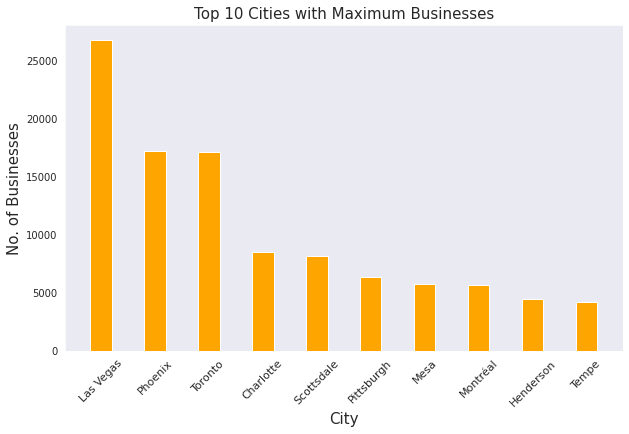

In [ ]:
city = pdf_top10['city']
counts = pdf_top10['count']
fig = plt.figure(figsize=(10,6))
plt.bar(city, counts, color ='orange',
        width = 0.4)
plt.xlabel('City', fontsize=15)
plt.xticks(rotation=45,fontsize=11)
plt.ylabel('No. of Businesses', fontsize=15)
plt.title('Top 10 Cities with Maximum Businesses', fontsize=15);

In [ ]:
open = business.select('business_id','is_open')
open = open.groupby('is_open').count()

In [ ]:
opendf = open.toPandas()

In [ ]:
opendf

,is_open,count
0,0,27865
1,1,146702


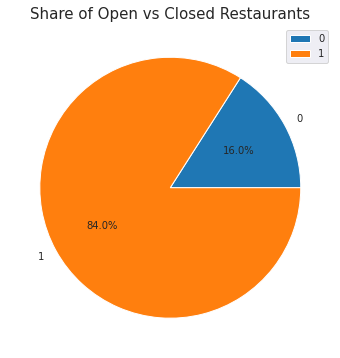

In [ ]:
is_open = opendf['is_open']
counts = opendf['count']
fig = plt.figure(figsize=(10,6))
plt.pie(counts,labels=is_open,autopct='%1.1f%%')
plt.legend()
plt.title('Share of Open vs Closed Restaurants', fontsize=15);

In [ ]:
business.filter(business.state.isin('NYK')).show()

+--------------------+--------------------+------------+--------------------+-----------+-----+-----------+-------------+-------------+-----+------------+-------+--------------------+
|         business_id|                name|neighborhood|             address|       city|state|postal_code|     latitude|    longitude|stars|review_count|is_open|          categories|
+--------------------+--------------------+------------+--------------------+-----------+-----+-----------+-------------+-------------+-----+------------+-------+--------------------+
|qzA-93v2lwf9qnCOP...|"Scarborough Deaf...|        null|       "Vernon Road"|Scarborough|  NYK|       YO11|   54.2799201|   -0.4000427|  4.0|           4|      1|Public Services &...|
|PjzIBRm4pxV_mivCZ...|"Duke Of Wellington"|        null|       "2 West Lane"|     Whitby|  NYK|   YO21 2LY|   54.4686545|   -0.9092471|  5.0|           3|      1|Hotels & Travel;E...|
|PX9ceQzCEX5AEn73_...|   "the coffee bean"|        null|   "columbus ravine"|Sca

In [ ]:
from pyspark.sql.functions import split,explode
category = business.select('categories')
individual_category = category.select(explode(split('categories', ';')).alias('category'))
grouped_category = individual_category.groupby('category').count()
top_category = grouped_category.sort('count',ascending=False)
top_category.show(10,truncate=False)

+----------------+-----+
|category        |count|
+----------------+-----+
|Restaurants     |54618|
|Shopping        |27971|
|Food            |24777|
|Beauty & Spas   |17014|
|Home Services   |16205|
|Health & Medical|14230|
|Nightlife       |12154|
|Local Services  |11232|
|Automotive      |11052|
|Bars            |10563|
+----------------+-----+
only showing top 10 rows



In [ ]:
categorydf = top_category.toPandas()

In [ ]:
categorydf_top10 = categorydf.head(10)

In [ ]:
categorydf_top10

,category,count
0,Restaurants,54618
1,Shopping,27971
2,Food,24777
3,Beauty & Spas,17014
4,Home Services,16205
5,Health & Medical,14230
6,Nightlife,12154
7,Local Services,11232
8,Automotive,11052
9,Bars,10563


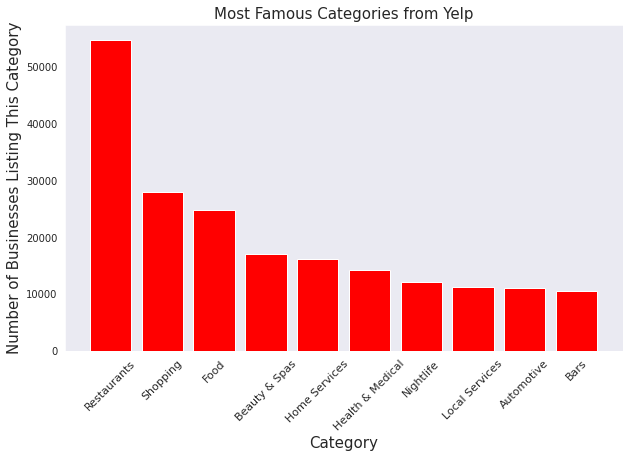

In [ ]:
category = categorydf_top10['category']
counts = categorydf_top10['count']
fig = plt.figure(figsize=(10,6))
plt.bar(category, counts, color ='red')
plt.xlabel('Category', fontsize=15)
plt.xticks(rotation = 45,fontsize=11)
plt.ylabel('Number of Businesses Listing This Category', fontsize=15)
plt.title('Most Famous Categories from Yelp', fontsize=15);

In [ ]:
stars = business.select('stars','business_id')
stars_group = stars.groupby('stars').count()
stars_sorted = stars_group.sort('stars',ascending=True)

In [ ]:
starsdf = stars_sorted.toPandas()

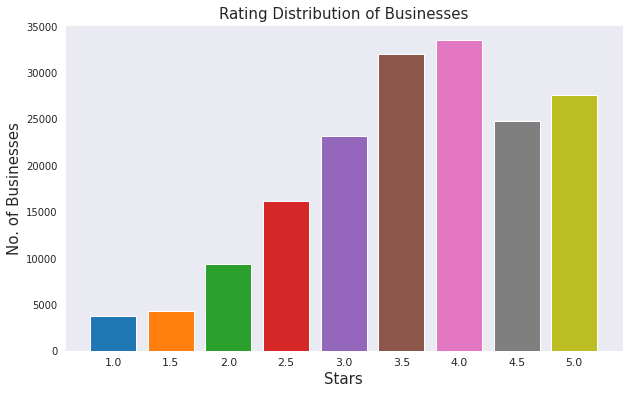

In [ ]:
stars = starsdf['stars']
counts = starsdf['count']
fig = plt.figure(figsize=(10,6))
plt.bar(stars, counts, color=['C0', 'C1', 'C2', 'C3', 'C4','C5','C6','C7','C8'])
plt.xlabel('Stars', fontsize=15)
plt.xticks(fontsize=11)
plt.ylabel('No. of Businesses', fontsize=15)
plt.title('Rating Distribution of Businesses', fontsize=15);

In [ ]:
business_pop = business.select('business_id','name','review_count','stars')

In [ ]:
import pyspark.sql.functions as F
business_popular = business_pop.withColumn("Stars_Rating", F.col("stars")*F.col("review_count"))

In [ ]:
most_popular = business_popular.sort('Stars_Rating',ascending=False)

In [ ]:
top_10_pop = most_popular.limit(10)

In [ ]:
top10df = top_10_pop.toPandas()

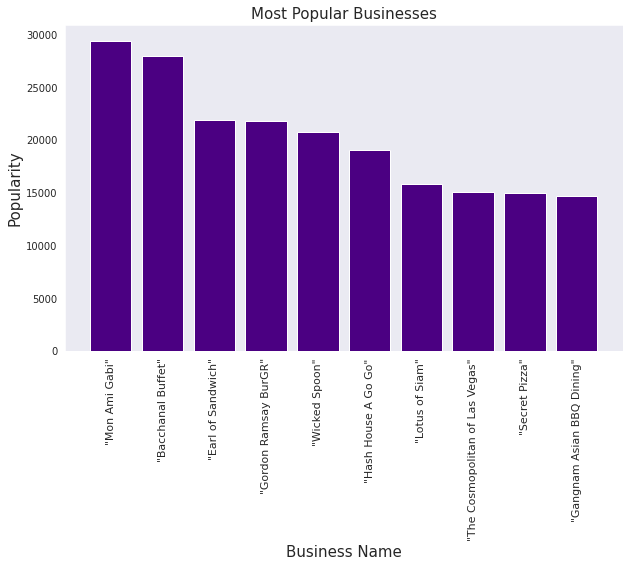

In [ ]:
name = top10df['name']
popularity = top10df['Stars_Rating']
fig = plt.figure(figsize=(10,6))
plt.bar(name, popularity, color ='indigo')
plt.xlabel('Business Name', fontsize=15)
plt.xticks(rotation = 90,fontsize=11)
plt.ylabel('Popularity', fontsize=15)
plt.title('Most Popular Businesses', fontsize=15);

## Review Data Set

In [ ]:
review = spark.read.format("csv").option("header","true").option("delimiter",",").option("quote", "\"").option("escape", "\"").load("/content/gdrive/MyDrive/Scalable/yelp-dataset/yelp_review.csv")

In [ ]:
review.printSchema()

root
 |-- review_id: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- business_id: string (nullable = true)
 |-- stars: string (nullable = true)
 |-- date: string (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: string (nullable = true)
 |-- funny: string (nullable = true)
 |-- cool: string (nullable = true)



In [ ]:
review = review.filter(review.stars.isin('5', '4', '3', '2', '1'))
review = review.filter("text is not null")
review = review.filter("date is not null")
review = review.withColumn("stars", review['stars'].cast("int"))
review = review.filter("stars is not null")
review.show()

+--------------------+--------------------+--------------------+-----+----------+--------------------+------+-----+----+
|           review_id|             user_id|         business_id|stars|      date|                text|useful|funny|cool|
+--------------------+--------------------+--------------------+-----+----------+--------------------+------+-----+----+
|vkVSCC7xljjrAI4UG...|bv2nCi5Qv5vroFiqK...|AEx2SYEUJmTxVVB18...|    5|2016-05-28|Super simple plac...|  null| null|null|
|n6QzIUObkYshz4dz2...|bv2nCi5Qv5vroFiqK...|VR6GpWIda3SfvPC-l...|    5|2016-05-28|Small unassuming ...|  null| null|null|
|MV3CcKScW05u5LVfF...|bv2nCi5Qv5vroFiqK...|CKC0-MOWMqoeWf6s-...|    5|2016-05-28|Lester's is locat...|  null| null|null|
|IXvOzsEMYtiJI0CAR...|bv2nCi5Qv5vroFiqK...|ACFtxLv8pGrrxMm6E...|    4|2016-05-28|Love coming here....|  null| null|null|
|L_9BTb55X0GDtThi6...|bv2nCi5Qv5vroFiqK...|s2I_Ni76bjJNK9yG6...|    4|2016-05-28|Had their chocola...|  null| null|null|
|HRPm3vEZ_F-33TYVT...|_4iMDXbXZ1

In [ ]:
review_filtered = review.select('text', 'stars')

## Ranking of Words in Reviews:

In [ ]:
lines = review_filtered.rdd.map(tuple)

In [ ]:
lines.persist()

PythonRDD[99] at RDD at PythonRDD.scala:53

In [ ]:
stopword_list = set(stopwords.words("english"))
def ProcessedText(text):
	tokens = nltk.word_tokenize(text)
	punct_rem = [word for word in tokens if word.isalpha()]
	remove_stopwords = [word for word in punct_rem if not word in stopword_list]
	return remove_stopwords

In [ ]:
line_5star = lines.filter(lambda x: x[1] == 5)
line_4star = lines.filter(lambda x: x[1] == 4)
line_3star = lines.filter(lambda x: x[1] == 3)
line_2star = lines.filter(lambda x: x[1] == 2)
line_1star = lines.filter(lambda x: x[1] == 1)

In [ ]:
words_5star = line_5star.flatMap(lambda x: ProcessedText(str(x).lower()))
words_4star = line_4star.flatMap(lambda x: ProcessedText(str(x).lower()))
words_3star = line_3star.flatMap(lambda x: ProcessedText(str(x).lower()))
words_2star = line_2star.flatMap(lambda x: ProcessedText(str(x).lower()))
words_1star = line_1star.flatMap(lambda x: ProcessedText(str(x).lower()))

In [ ]:
words_5_freq = words_5star.map(lambda x:(x,1))
words_4_freq = words_4star.map(lambda x:(x,1))
words_3_freq = words_3star.map(lambda x:(x,1))
words_2_freq = words_2star.map(lambda x:(x,1))
words_1_freq = words_1star.map(lambda x:(x,1))

In [ ]:
res_5 = words_5_freq.reduceByKey(lambda x,y:x+y)
res_4 = words_4_freq.reduceByKey(lambda x,y:x+y)
res_3 = words_3_freq.reduceByKey(lambda x,y:x+y)
res_2 = words_2_freq.reduceByKey(lambda x,y:x+y)
res_1 = words_1_freq.reduceByKey(lambda x,y:x+y)

In [ ]:
sort_5 = (sorted(res_5.collect(),key = lambda x:x[1],reverse=True)[:10])
sort_4 = (sorted(res_4.collect(),key = lambda x:x[1],reverse=True)[:10])
sort_3 = (sorted(res_3.collect(),key = lambda x:x[1],reverse=True)[:10])
sort_2 = (sorted(res_2.collect(),key = lambda x:x[1],reverse=True)[:10])
sort_1 = (sorted(res_1.collect(),key = lambda x:x[1],reverse=True)[:10])

ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.7/dist-packages/py4j/clientserver.py", line 475, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.7/socket.py", line 589, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: ignored

In [ ]:
sort_5_b = sc.parallelize(sort_5)
sort_5_words = sort_5_b.map(lambda x: x[0])
sort_4_b = sc.parallelize(sort_4)
sort_4_words = sort_4_b.map(lambda x: x[0])
sort_3_b = sc.parallelize(sort_3)
sort_3_words = sort_3_b.map(lambda x: x[0])
sort_2_b = sc.parallelize(sort_2)
sort_2_words = sort_2_b.map(lambda x: x[0])
sort_1_b = sc.parallelize(sort_1)
sort_1_words = sort_1_b.map(lambda x: x[0])

In [ ]:
print("1 star rating: ",sort_1_words.collect())
print("2 star rating: ",sort_2_words.collect())
print("3 star rating: ",sort_3_words.collect())
print("4 star rating: ",sort_4_words.collect())
print("5 star rating: ",sort_5_words.collect())

## Calculate Average Length of Reviews

In [ ]:
lines = review_filtered.rdd.map(tuple)

In [ ]:
lines.persist()

In [ ]:
def ProcessedText(text):
    return re.sub('\W+', ' ', str(text))

In [ ]:
line_5star = lines.filter(lambda x: x[1] == 5)
line_4star = lines.filter(lambda x: x[1] == 4)
line_3star = lines.filter(lambda x: x[1] == 3)
line_2star = lines.filter(lambda x: x[1] == 2)
line_1star = lines.filter(lambda x: x[1] == 1)

In [ ]:
count_5 = line_5star.count()
count_4 = line_4star.count()
count_3 = line_3star.count()
count_2 = line_2star.count()
count_1 = line_1star.count()

In [ ]:
line_5_punct_rem = line_5star.map(lambda x:ProcessedText(x))
line_4_punct_rem = line_4star.map(lambda x:ProcessedText(x))
line_3_punct_rem = line_3star.map(lambda x:ProcessedText(x))
line_2_punct_rem = line_2star.map(lambda x:ProcessedText(x))
line_1_punct_rem = line_1star.map(lambda x:ProcessedText(x))

In [ ]:
words_5 = line_5_punct_rem.flatMap(lambda x:x.lower().split(" "))
words_4 = line_4_punct_rem.flatMap(lambda x:x.lower().split(" "))
words_3 = line_3_punct_rem.flatMap(lambda x:x.lower().split(" "))
words_2 = line_2_punct_rem.flatMap(lambda x:x.lower().split(" "))
words_1 = line_1_punct_rem.flatMap(lambda x:x.lower().split(" "))

In [ ]:
words_5.take(10)

In [ ]:
total_length_5_star = words_5.count()
total_length_4_star = words_4.count()
total_length_3_star = words_3.count()
total_length_2_star = words_2.count()
total_length_1_star = words_1.count()

In [ ]:
avg_count_5 = total_length_5_star/count_5
avg_count_4 = total_length_4_star/count_4
avg_count_3 = total_length_3_star/count_3
avg_count_2 = total_length_2_star/count_2
avg_count_1 = total_length_1_star/count_1

In [ ]:
avg_count_1

In [ ]:
print("5 star rating: average length of comments ", avg_count_5)
print("4 star rating: average length of comments ", avg_count_4)
print("3 star rating: average length of comments ", avg_count_3)
print("2 star rating: average length of comments ", avg_count_2)
print("1 star rating: average length of comments ", avg_count_1)

## Review Visualization:

In [ ]:
review_per_star = review.select('review_id', 'stars')
count_per_star = review_per_star.groupby('stars').count()
cnt_str = count_per_star.sort('count', ascending = False)
pdf_stars = cnt_str.toPandas()
pdf_stars

In [ ]:
plt.figure(figsize=(10,6))
pdf_stars.plot(kind='bar',x='stars',y='count', figsize=(8,6),color='orange')
plt.xlabel('Ratings', fontsize=15)
plt.xticks(rotation = 0, fontsize = 11)
plt.ylabel('No. of Reviews', fontsize=15)
plt.title('Distribution is Comments per Rating', fontsize=15);

In [ ]:
word_count = review.select( \
    col("stars"), \
    trim(col("text")).alias("text"), \
    )
review.select('stars', 'text')
word_count = word_count.withColumn('length', f.size(f.split(f.col('text'), ' ')))
word_count.show()

In [ ]:
avg_word_cnt = word_count.groupBy("stars").avg("length")
avg_word_cnt = avg_word_cnt.withColumnRenamed("avg(length)","Avg_Comment_Length")
avg_word_cnt = avg_word_cnt.withColumn("Avg_Comment_Length", round(col("Avg_Comment_Length"), 2))
cnt_wrds = avg_word_cnt.sort('Avg_Comment_Length', ascending = False)
pdf = cnt_wrds.toPandas()
pdf.head()

In [ ]:
plt.figure(figsize=(10,6))
pdf.plot(kind='bar',x='stars',y='Avg_Comment_Length', figsize=(8,6), color='purple')
plt.xlabel('Ratings', fontsize=15)
plt.xticks(rotation = 0, fontsize=11)
plt.ylabel('Average Length of Reviews', fontsize=15)
plt.title('Average Length of Reviews per Rating', fontsize=15);

In [ ]:
from pyspark.sql.functions import *

month_comment = review.select(col("text"), col("date"), to_date(col("date"),"yyyy-MM-dd"))
month_comment = month_comment.drop(col("date"))
month_comment = month_comment.withColumnRenamed("to_date(date, yyyy-MM-dd)","date")
month_comment = month_comment.filter("text is not null")
month_comment = month_comment.filter("date is not null")
month_comment = month_comment.select(col("text"), date_format(col("date"), "MMMM").alias("month"))
month_comment.show()

In [ ]:
month_comment.printSchema()

In [ ]:
mnth_com = month_comment.groupby('month').count()
pdf_mon = mnth_com.toPandas()
pdf_mon

In [ ]:
month = pdf_mon['month']
rev_mon_cnt = pdf_mon['count']
fig = plt.figure(figsize=(10,6))
plt.bar(month, rev_mon_cnt, color ='blue', width = 0.4)
plt.xlabel('Monthly Distribution of Comments', fontsize=15)
plt.xticks(rotation = 45, fontsize=11)
plt.ylabel('No. of Reviews', fontsize=15)
plt.title('Monthly Count of Comments over the Years', fontsize=15);

In [ ]:
user = spark.read.option("delimiter",",").option("header","true").csv('/content/gdrive/MyDrive/Scalable/yelp-dataset/yelp_user.csv')

In [ ]:
user.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: string (nullable = true)
 |-- yelping_since: string (nullable = true)
 |-- friends: string (nullable = true)
 |-- useful: string (nullable = true)
 |-- funny: string (nullable = true)
 |-- cool: string (nullable = true)
 |-- fans: string (nullable = true)
 |-- elite: string (nullable = true)
 |-- average_stars: string (nullable = true)
 |-- compliment_hot: string (nullable = true)
 |-- compliment_more: string (nullable = true)
 |-- compliment_profile: string (nullable = true)
 |-- compliment_cute: string (nullable = true)
 |-- compliment_list: string (nullable = true)
 |-- compliment_note: string (nullable = true)
 |-- compliment_plain: string (nullable = true)
 |-- compliment_cool: string (nullable = true)
 |-- compliment_funny: string (nullable = true)
 |-- compliment_writer: string (nullable = true)
 |-- compliment_photos: string (nullable = true)



In [ ]:
user_filtered = user.select('user_id','name','review_count','yelping_since','friends','useful','funny','cool','elite','average_stars')


In [ ]:
user_filtered = user_filtered.withColumn("average_stars",user_filtered['average_stars'].cast("double"))

**Rounding off the values for "Average_Stars" column**

In [ ]:
user_filtered = user_filtered.withColumn("average_stars",func.round(user_filtered['average_stars']))

**Checking for null records in the Dataframe**



In [ ]:
user_filtered.select([func.count(func.when(func.isnull(c), c)).alias(c) for c in user_filtered.columns]).show()

+-------+----+------------+-------------+-------+------+-----+----+-----+-------------+
|user_id|name|review_count|yelping_since|friends|useful|funny|cool|elite|average_stars|
+-------+----+------------+-------------+-------+------+-----+----+-----+-------------+
|      0| 495|           0|            0|      0|     0|    0|   0|    0|            0|
+-------+----+------------+-------------+-------+------+-----+----+-----+-------------+



**Dropping null records**

In [ ]:
user_filtered_nna = user_filtered.dropna()

In [ ]:
user_filtered_nna.select([func.count(func.when(func.isnull(c), c)).alias(c) for c in user_filtered.columns]).show()


+-------+----+------------+-------------+-------+------+-----+----+-----+-------------+
|user_id|name|review_count|yelping_since|friends|useful|funny|cool|elite|average_stars|
+-------+----+------------+-------------+-------+------+-----+----+-----+-------------+
|      0|   0|           0|            0|      0|     0|    0|   0|    0|            0|
+-------+----+------------+-------------+-------+------+-----+----+-----+-------------+



In [ ]:
user_filtered_nna.count()

In [ ]:
user_filtered_nna.show()

In [ ]:
reviews = spark.read.format("csv").option("header","true").option("delimiter",",").option("quote", "\"").option("escape", "\"").load("/content/gdrive/MyDrive/Scalable/yelp-dataset/yelp_review.csv")

In [ ]:
reviews = reviews.filter("review_id is not null")
reviews = reviews.filter("user_id is not null")
reviews = reviews.filter("business_id is not null")
reviews = reviews.filter("date is not null")
reviews = reviews.filter("text is not null")


In [ ]:
reviews = reviews.filter(reviews.stars.isin('5', '4', '3', '2', '1'))

In [ ]:
reviews.count()

In [ ]:
all_users = user_filtered_nna.select('user_id','elite')
ref_rev = reviews.select('user_id','text','business_id','stars')
all_user_reviews = all_users.join(ref_rev,'user_id','inner')

In [ ]:
all_user_reviews.show()

In [ ]:
from pyspark.sql.functions import when, col


In [ ]:
conditions = when(col("elite").isin('None'), 0).otherwise(1)
all_user_reviews = all_user_reviews.withColumn("Is_Elite", conditions)

In [ ]:
all_user_reviews.show()

In [ ]:
business = spark.read.format("csv").option("header","true").option("delimiter",",").option("quote", "\"").option("escape", "\"").load("/content/gdrive/MyDrive/Scalable/yelp-dataset/yelp_business.csv")

In [ ]:
business.show()

In [ ]:
ref_bussiness = business.select('business_id','name','state','categories')
buss_usr_rev = all_user_reviews.join(ref_bussiness, 'business_id','inner')

In [ ]:
buss_usr_rev.show()

**Elite users tend to review which kind of businesses the most**

In [ ]:
from pyspark.sql.functions import split,explode
eli_buss = buss_usr_rev.filter(buss_usr_rev.Is_Elite.isin(1))
category = eli_buss.select('categories')
individual_category = category.select(explode(split('categories', ';')).alias('category'))
grouped_category = individual_category.groupby('category').count()
top_category = grouped_category.sort('count',ascending=False)
top_category.show(10,truncate=False)

In [ ]:
df_5 = top_category.toPandas()

In [ ]:
df_5 = df_5.head(10)

In [ ]:
df_5

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px
fig = px.pie(df_5, values='count', names='category', title='Businesses popular among Elite Users',\
             color_discrete_sequence=px.colors.sequential.matter)
fig.show()

**Non-Elite users tend to review which kind of businesses the most**

In [ ]:
from pyspark.sql.functions import split,explode
no_eli_buss = buss_usr_rev.filter(buss_usr_rev.Is_Elite.isin(0))
category2 = no_eli_buss.select('categories')
individual_category2 = category2.select(explode(split('categories', ';')).alias('category'))
grouped_category2 = individual_category2.groupby('category').count()
top_category2 = grouped_category2.sort('count',ascending=False)
top_category2.show(10,truncate=False)

NameError: ignored

In [ ]:
df_4 = top_category2.toPandas()

In [ ]:
df_4 = df_4.head(10)

In [ ]:
df_4

In [ ]:
fig = px.pie(df_4, values='count', names='category', title='Businesses popular among Non-Elite Users',\
             color_discrete_sequence=px.colors.sequential.haline)
fig.show()

In [ ]:
top_category2

**Top Businesses Reviewed by Elite Users**

In [ ]:
from pyspark.sql.functions import split,explode
eli_name = buss_usr_rev.filter(buss_usr_rev.Is_Elite.isin(1))
name_buss = eli_name.select('name')
grouped_category3 = name_buss.groupby('name').count()
top_buss = grouped_category3.sort('count',ascending=False)
top_buss.show(10,truncate=False)

In [ ]:
df_6 = top_buss.toPandas()

In [ ]:
df_6 = df_6.head(10)

In [ ]:
df_6['count'] = df_6['count'].astype('float')

In [ ]:
df_6.info()

In [ ]:
df_6.plot(kind='barh',x='name',y='count', figsize=(8,6),color='navy')
plt.title("Business outlets popular among Elite Users",fontsize=18)
plt.xlabel('Number of Reviews')
plt.ylabel('Name of the Business')
for index,row in df_6.iterrows():
  row = (row['count'])
  label = format(int(row),',')
  plt.annotate(label,xy=(row - 600,index - 0.1),color='white',fontweight='bold')

**Top Businesses Reviewed by Non-Elite Users**

In [ ]:
from pyspark.sql.functions import split,explode
no_eli_name = buss_usr_rev.filter(buss_usr_rev.Is_Elite.isin(0))
no_name_buss = no_eli_name.select('name')
grouped_category4 = no_name_buss.groupby('name').count()
top_buss2 = grouped_category4.sort('count',ascending=False)
top_buss2.show(10,truncate=False)

In [ ]:
df_7 = top_buss2.toPandas()

In [ ]:
df_7 = df_7.head(10)

In [ ]:
df_7['count'] = df_7['count'].astype('float')

In [ ]:
df_7.plot(kind='barh',x='name',y='count', figsize=(8,6),color='teal')
plt.title("Business outlets popular among Non-Elite Users",fontsize=18)
plt.xlabel('Number of Reviews')
plt.ylabel('Name of the Business')
for index,row in df_7.iterrows():
  row = (row['count'])
  label = format(int(row),',')
  plt.annotate(label,xy=(row - 1200,index - 0.1),color='white',fontweight='bold')

## Classification Model 

In [ ]:
all_user_reviews.show()

In [ ]:
all_user_text = all_user_reviews.select('text','Is_Elite')

In [ ]:
all_user_text.count()

In [ ]:
from pyspark.ml.feature import Tokenizer, HashingTF, IDF 
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.sql.functions import col

In [ ]:
import nltk
import re 

In [ ]:
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords
stopwords_nltk = set(nltk.corpus.stopwords.words('english'))

In [ ]:
nltk.download('punkt')

In [ ]:
all_user_text.printSchema()

In [ ]:
all_user_text.show(2)

In [ ]:
#2 ML pipeline

from pyspark.ml.feature import StopWordsRemover



tokenizer = Tokenizer(inputCol = "text", outputCol = "words") 
remover = StopWordsRemover(inputCol="words", outputCol="filtered")
TF = HashingTF(inputCol = tokenizer.getOutputCol(), outputCol = "tfFeatures")
idf = IDF(inputCol = "tfFeatures",outputCol = "features")
lr = LogisticRegression(maxIter = 10, regParam = 0.001)
pipeline = Pipeline(stages = [tokenizer,remover,TF,idf,lr])

In [ ]:
all_user_text = all_user_text.withColumnRenamed("Is_Elite","label")

In [ ]:
all_user_text.show()

In [ ]:
train = all_user_text.sampleBy("label", fractions={0: 0.9, 1: 0.9}, seed=10)

In [ ]:
test = all_user_text.subtract(train)

In [ ]:
train.show()

In [ ]:
train.groupBy('label').count().show()

In [ ]:
model = pipeline.fit(train)

In [ ]:
prediction = model.transform(test)

In [ ]:
prediction.show()

In [ ]:
from sklearn import metrics

actual = prediction.select('label').toPandas()
predicted = prediction.select('prediction').toPandas()

In [ ]:
predicted['prediction'] = predicted['prediction'].astype(int)
predicted_arr = predicted['prediction'].to_numpy()
actual_arr = actual['label'].to_numpy()

In [ ]:
predicted_arr

In [ ]:
print('accuracy score: {}%'.format(round(metrics.accuracy_score(actual_arr, predicted_arr),3)*100))

In [ ]:
model.save("/content/gdrive/MyDrive/Scalable/elite_model.model")

In [ ]:
selected = prediction.select("text","probability","prediction")
for row in selected.collect():
	text, prob, prediction = row
	print("%s --> prediction = %f" %(text, prediction))

In [ ]:
acc = prediction.select("label","prediction")

In [ ]:
acc.show()

In [ ]:
acc2 = acc.withColumn("Valid", )

In [ ]:
conditions = when(col("label")==col("prediction"), 1).otherwise(0)
acc2 = acc.withColumn("Valid", conditions)

In [ ]:
acc2.groupBy("Valid").count().show()